# Import Libraries

In [1]:
# Here importing (Accessing) machine learning toolkits
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Normalizing numerical data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input # Input layer instead of specifying input_dim directly in the Dense layer.
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load Dataset

In [2]:
# Here extracting and reading dataset (DataFrame)
df = pd.read_csv('cybersecurity_attacks.csv') # Path of Dataset file
# Here we are display all records of dataset
print("Data Loaded:")
print(df)

Data Loaded:
                 Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     ICMP            5

In [3]:
# Transposing your data
print(df.T)

                                                                    0      \
Timestamp                                             2023-05-30 06:33:58   
Source IP Address                                           103.216.15.12   
Destination IP Address                                       84.9.164.252   
Source Port                                                         31225   
Destination Port                                                    17616   
Protocol                                                             ICMP   
Packet Length                                                         503   
Packet Type                                                          Data   
Traffic Type                                                         HTTP   
Payload Data            Qui natus odio asperiores nam. Optio nobis ius...   
Malware Indicators                                           IoC Detected   
Anomaly Scores                                                      28.67   

In [4]:
# Here using shape to get total records and total columns
print(df.shape)

(40000, 25)


In [5]:
# Here using len() function to find total length of records in dataset
print(len(df))

40000


In [6]:
# size is used to get total number of elements (records) 
print(df.size)

1000000


In [7]:
# Here using info() for get the details of dataset fields (columns)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [8]:
# Here using head function for display first 5 records
print(df.head())

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

In [9]:
# Here using head function to display first 20 records
print(df.head(20)) 

              Timestamp Source IP Address Destination IP Address  Source Port  \
0   2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1   2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2   2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3   2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4   2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   
5   2022-10-28 13:14:27     198.102.5.160        147.190.155.133        17430   
6   2022-05-16 17:55:43     97.253.103.59           77.16.101.53        26562   
7   2023-02-12 07:13:17      11.48.99.245         178.157.14.116        34489   
8   2023-06-27 11:02:56     49.32.208.167           72.202.237.9        56296   
9   2021-08-15 22:29:04   114.109.149.113         160.88.194.172        37918   
10  2022-07-20 13:28:50     177.21.83.200        196.218.124.169        35538   
11  2022-06-26 15:15:50     

In [10]:
# Here using slice for display 50 to 100 Records 
print(df[50:200])

               Timestamp Source IP Address Destination IP Address  \
50   2023-01-18 01:12:24     122.130.86.58          110.54.165.63   
51   2021-04-16 12:48:40       193.45.37.6           191.56.96.54   
52   2022-04-28 14:18:26     68.123.14.202          168.106.24.90   
53   2023-02-20 06:41:55      19.14.168.54          68.144.93.235   
54   2020-12-13 02:43:04   168.159.245.149         211.64.146.125   
..                   ...               ...                    ...   
195  2021-03-14 01:11:09   110.238.142.101        165.183.173.131   
196  2021-01-30 22:12:29     199.1.140.129          109.89.146.42   
197  2021-01-01 11:50:19      205.37.0.136         82.243.180.194   
198  2020-08-08 06:13:44    133.45.221.126           91.73.252.92   
199  2021-10-22 15:43:07    166.253.212.92          87.142.87.242   

     Source Port  Destination Port Protocol  Packet Length Packet Type  \
50         49005             19289     ICMP            317        Data   
51         56497       

In [11]:
# Here using tail function to display last 5 records
print(df.tail())

                 Timestamp Source IP Address Destination IP Address  \
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
39995        31005              6764      UDP           1428     Control   
39996         2553             28091      UDP           1184     Control   
39997        22505             25152      UDP           1043        Data   
39998        20013              2703      UDP            483        Data   
39999        50137             55575     ICMP           1175     Control   

      Traffic Type                                       Payload Data  ...  \
39995         HTTP  Quibusdam ullam co

In [12]:
# Here display last 20 records
print(df.tail(20))

                 Timestamp Source IP Address Destination IP Address  \
39980  2021-07-01 19:09:43   113.228.203.251             9.92.96.13   
39981  2021-09-15 01:03:48    188.133.58.141           25.179.17.77   
39982  2020-10-24 19:32:43     24.150.253.66         163.192.200.17   
39983  2020-05-13 05:08:25      138.156.5.40          91.54.135.213   
39984  2023-09-16 07:57:45   168.119.246.120          106.225.9.156   
39985  2022-04-08 08:44:40        66.33.24.5        160.140.249.175   
39986  2023-01-09 02:03:32      45.144.27.57            29.82.15.40   
39987  2022-11-05 11:34:58     19.154.37.195        163.191.169.236   
39988  2021-02-09 03:53:42     160.10.82.152          1.179.113.201   
39989  2020-02-25 12:10:40     109.15.148.90         136.251.191.39   
39990  2022-03-17 12:32:16    149.46.211.219           62.75.28.249   
39991  2020-11-14 05:41:54    66.200.132.243           88.211.51.78   
39992  2021-08-13 18:57:13    163.227.253.64          98.219.251.81   
39993 

In [13]:
# Here using columns to get all name of columns from dataset
print(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [14]:
# Here using value to get all values from dataset
print(df. values)

[['2023-05-30 06:33:58' '103.216.15.12' '84.9.164.252' ... 'Log Data' nan
  'Server']
 ['2020-08-26 07:08:30' '78.199.217.198' '66.191.137.154' ... 'Log Data'
  nan 'Firewall']
 ['2022-11-13 08:23:25' '63.79.210.48' '198.219.82.17' ... 'Log Data'
  'Alert Data' 'Firewall']
 ...
 ['2022-03-31 01:45:49' '162.35.217.57' '98.107.0.15' ... 'Log Data'
  'Alert Data' 'Server']
 ['2023-09-22 18:32:38' '208.72.233.205' '173.79.112.252' ... 'Log Data'
  nan 'Server']
 ['2023-10-10 11:59:52' '14.102.21.108' '109.198.45.7' ... 'Log Data'
  'Alert Data' 'Firewall']]


In [15]:
# Here using index. We can get starting, ending indexes with default 1 step  
print(df.index)

RangeIndex(start=0, stop=40000, step=1)


In [16]:
# Here using dtype to Check types for all the columns
print(df.dtypes)

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object


In [17]:
#Check a particular column type
df['Proxy Information'].dtype

dtype('O')

In [18]:
#Check a particular column type
df['Anomaly Scores'].dtype

dtype('float64')

In [19]:
# Here using describe() function. describe () show statistic summary of your data. generate descriptive statistics (for numeric columns only)
print(df.describe())

        Source Port  Destination Port  Packet Length  Anomaly Scores
count  40000.000000      40000.000000   40000.000000    40000.000000
mean   32970.356450      33150.868650     781.452725       50.113473
std    18560.425604      18574.668842     416.044192       28.853598
min     1027.000000       1024.000000      64.000000        0.000000
25%    16850.750000      17094.750000     420.000000       25.150000
50%    32856.000000      33004.500000     782.000000       50.345000
75%    48928.250000      49287.000000    1143.000000       75.030000
max    65530.000000      65535.000000    1500.000000      100.000000


In [20]:
# Here finding max number of a particular column
print(df['Packet Length'].max())

1500


In [21]:
# Here finding min number of a particular column
print(df['Destination Port'].min())

1024


In [22]:
# Here count total number of a particular column
print(df['Packet Length'].count())

40000


In [23]:
# # Here using mean () function.  return mean (Average) for a particular numeric columns
print(df['Destination Port'].mean())

33150.86865


In [24]:
# Here return medianvalues for a particular numeric columns
print(df['Destination Port']. median())

33004.5


In [25]:
# Here finding standard deviation
print(df['Source Port']. std())

18560.425604487333


In [26]:
# All attributes and methods can be listed with a dir() function: dir(df)
# print(dir(df))

In [27]:
# check Nan and missing values in dataset
null_values = df.isnull() # df.isna() # df.isnull().any
print(null_values)

       Timestamp  Source IP Address  Destination IP Address  Source Port  \
0          False              False                   False        False   
1          False              False                   False        False   
2          False              False                   False        False   
3          False              False                   False        False   
4          False              False                   False        False   
...          ...                ...                     ...          ...   
39995      False              False                   False        False   
39996      False              False                   False        False   
39997      False              False                   False        False   
39998      False              False                   False        False   
39999      False              False                   False        False   

       Destination Port  Protocol  Packet Length  Packet Type  Traffic Type  \
0       

In [28]:
# Here checking total null values in every column
null_values = df.isnull().sum() # df.isna() # df.isnull().any
print(null_values)

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


In [29]:
# Here keeping all null values columns
# df['Malware Indicators','Alerts/Warnings','Proxy Information','Firewall Logs','IDS/IPS Alerts']

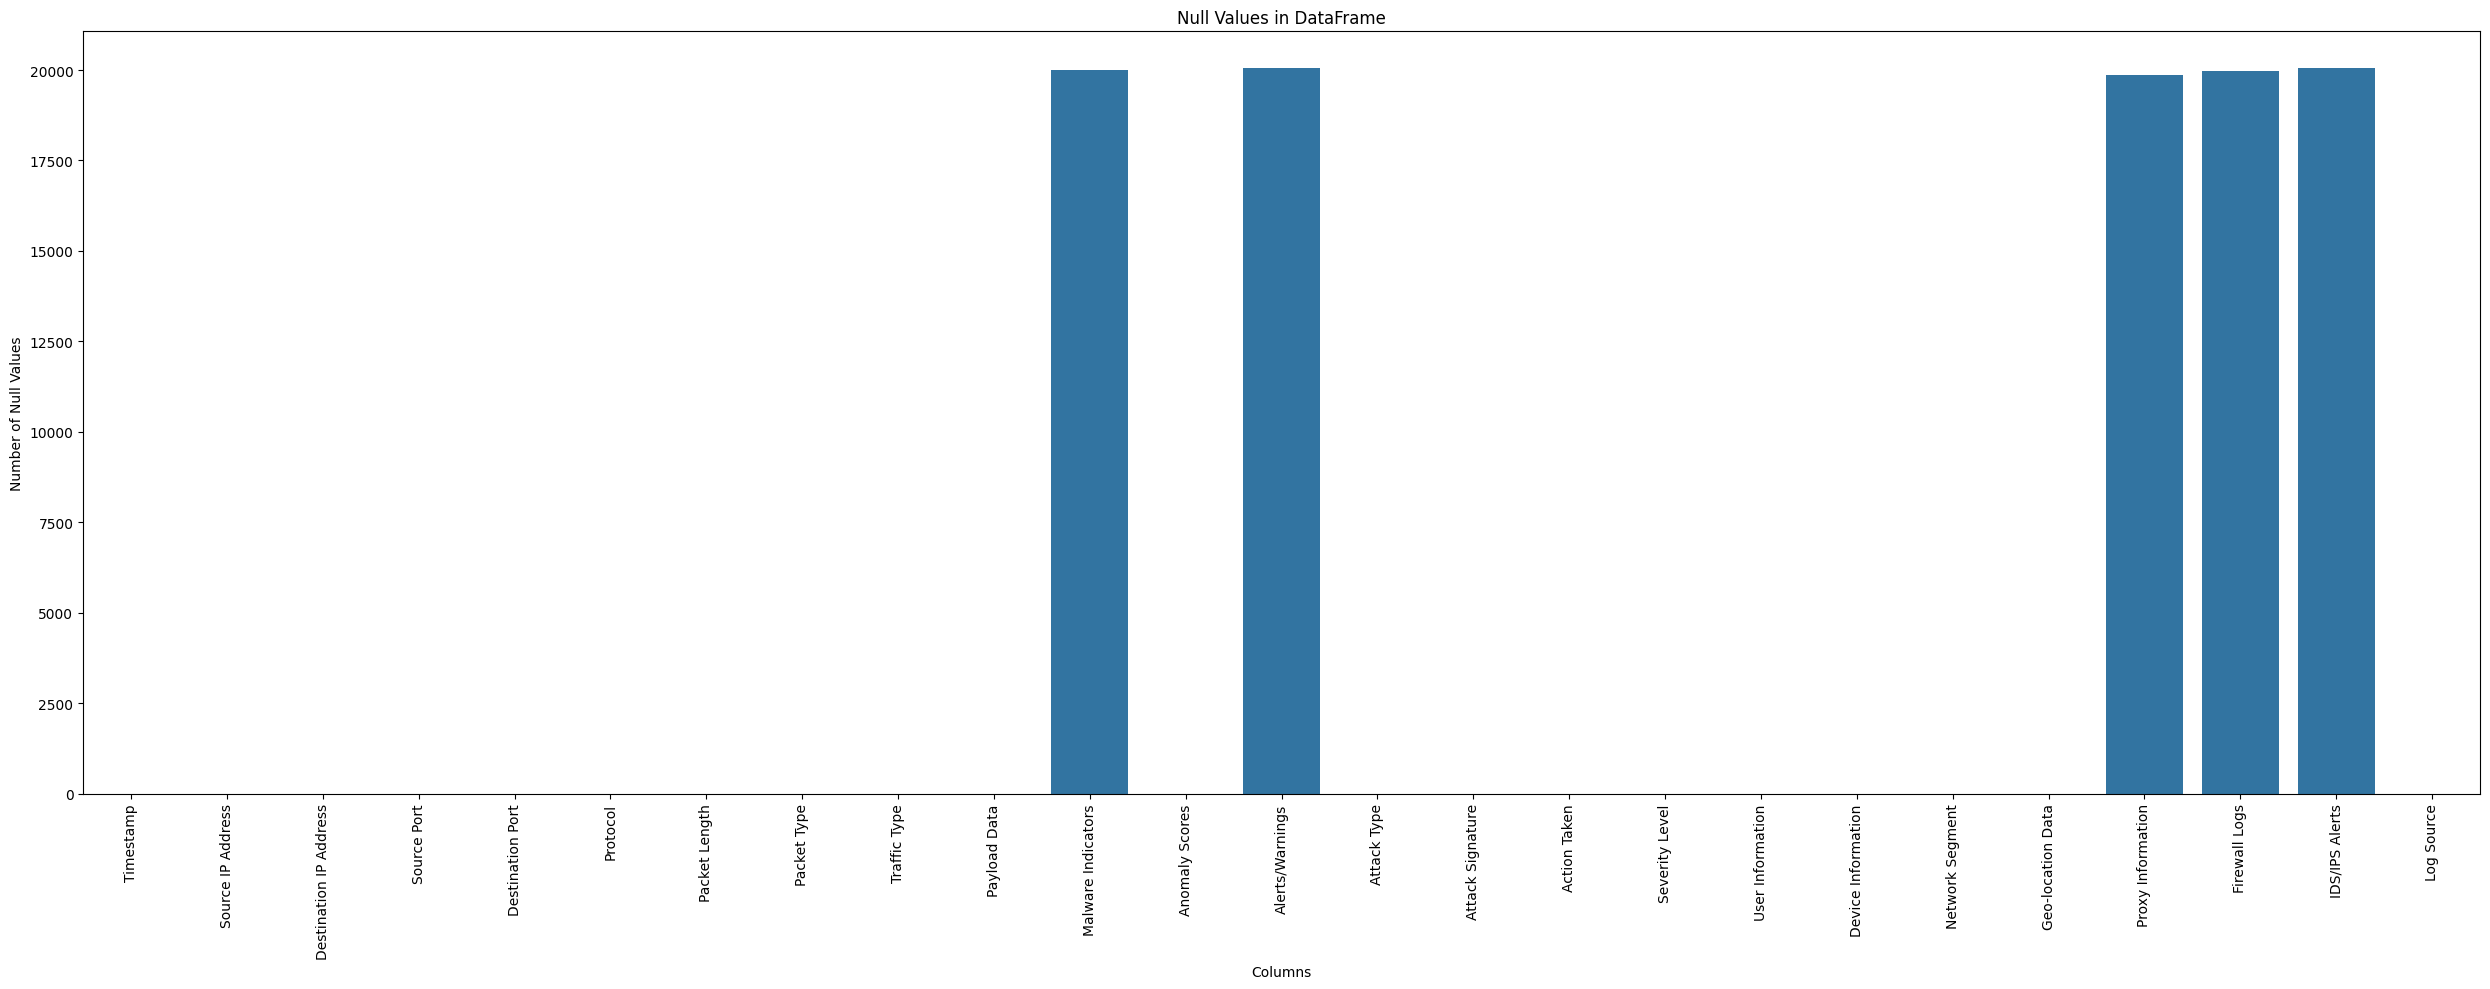

In [30]:
# Here Create a bar plot
plt.figure(figsize=(25, 10))  # Increase the figure size
sns.barplot(x=null_values.index, y=null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in DataFrame')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()  # Given Results x-axis represents the column names and the y-axis represents the number of null values

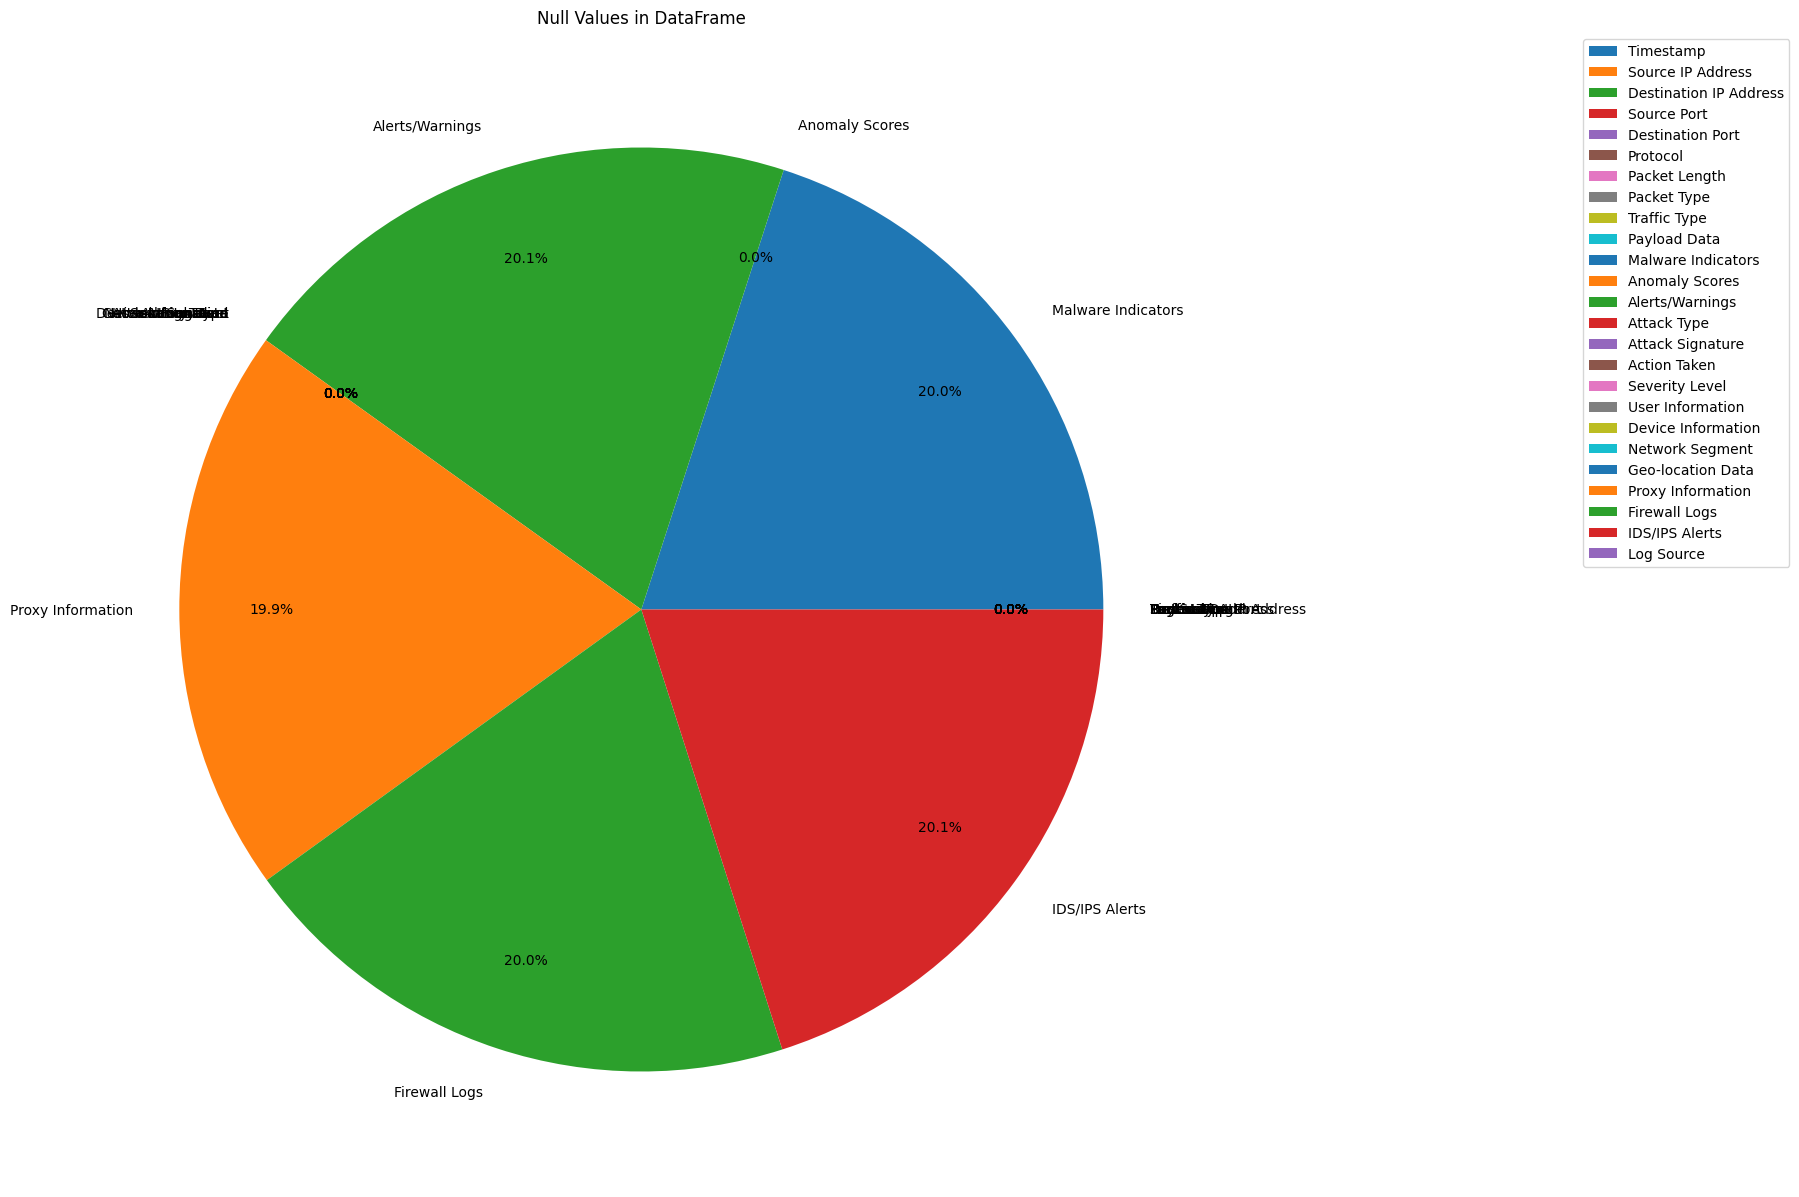

In [31]:
# Here using Pie Chart graph to display null values
plt.figure(figsize=(25, 15))  # Increase the figure size
plt.pie(null_values.values, labels=null_values.index, autopct='%1.1f%%', pctdistance=0.8)
plt.title('Null Values in DataFrame')
plt.legend(null_values.index, loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show() # # Given Results x-axis represents the column names and the y-axis represents the number of null values

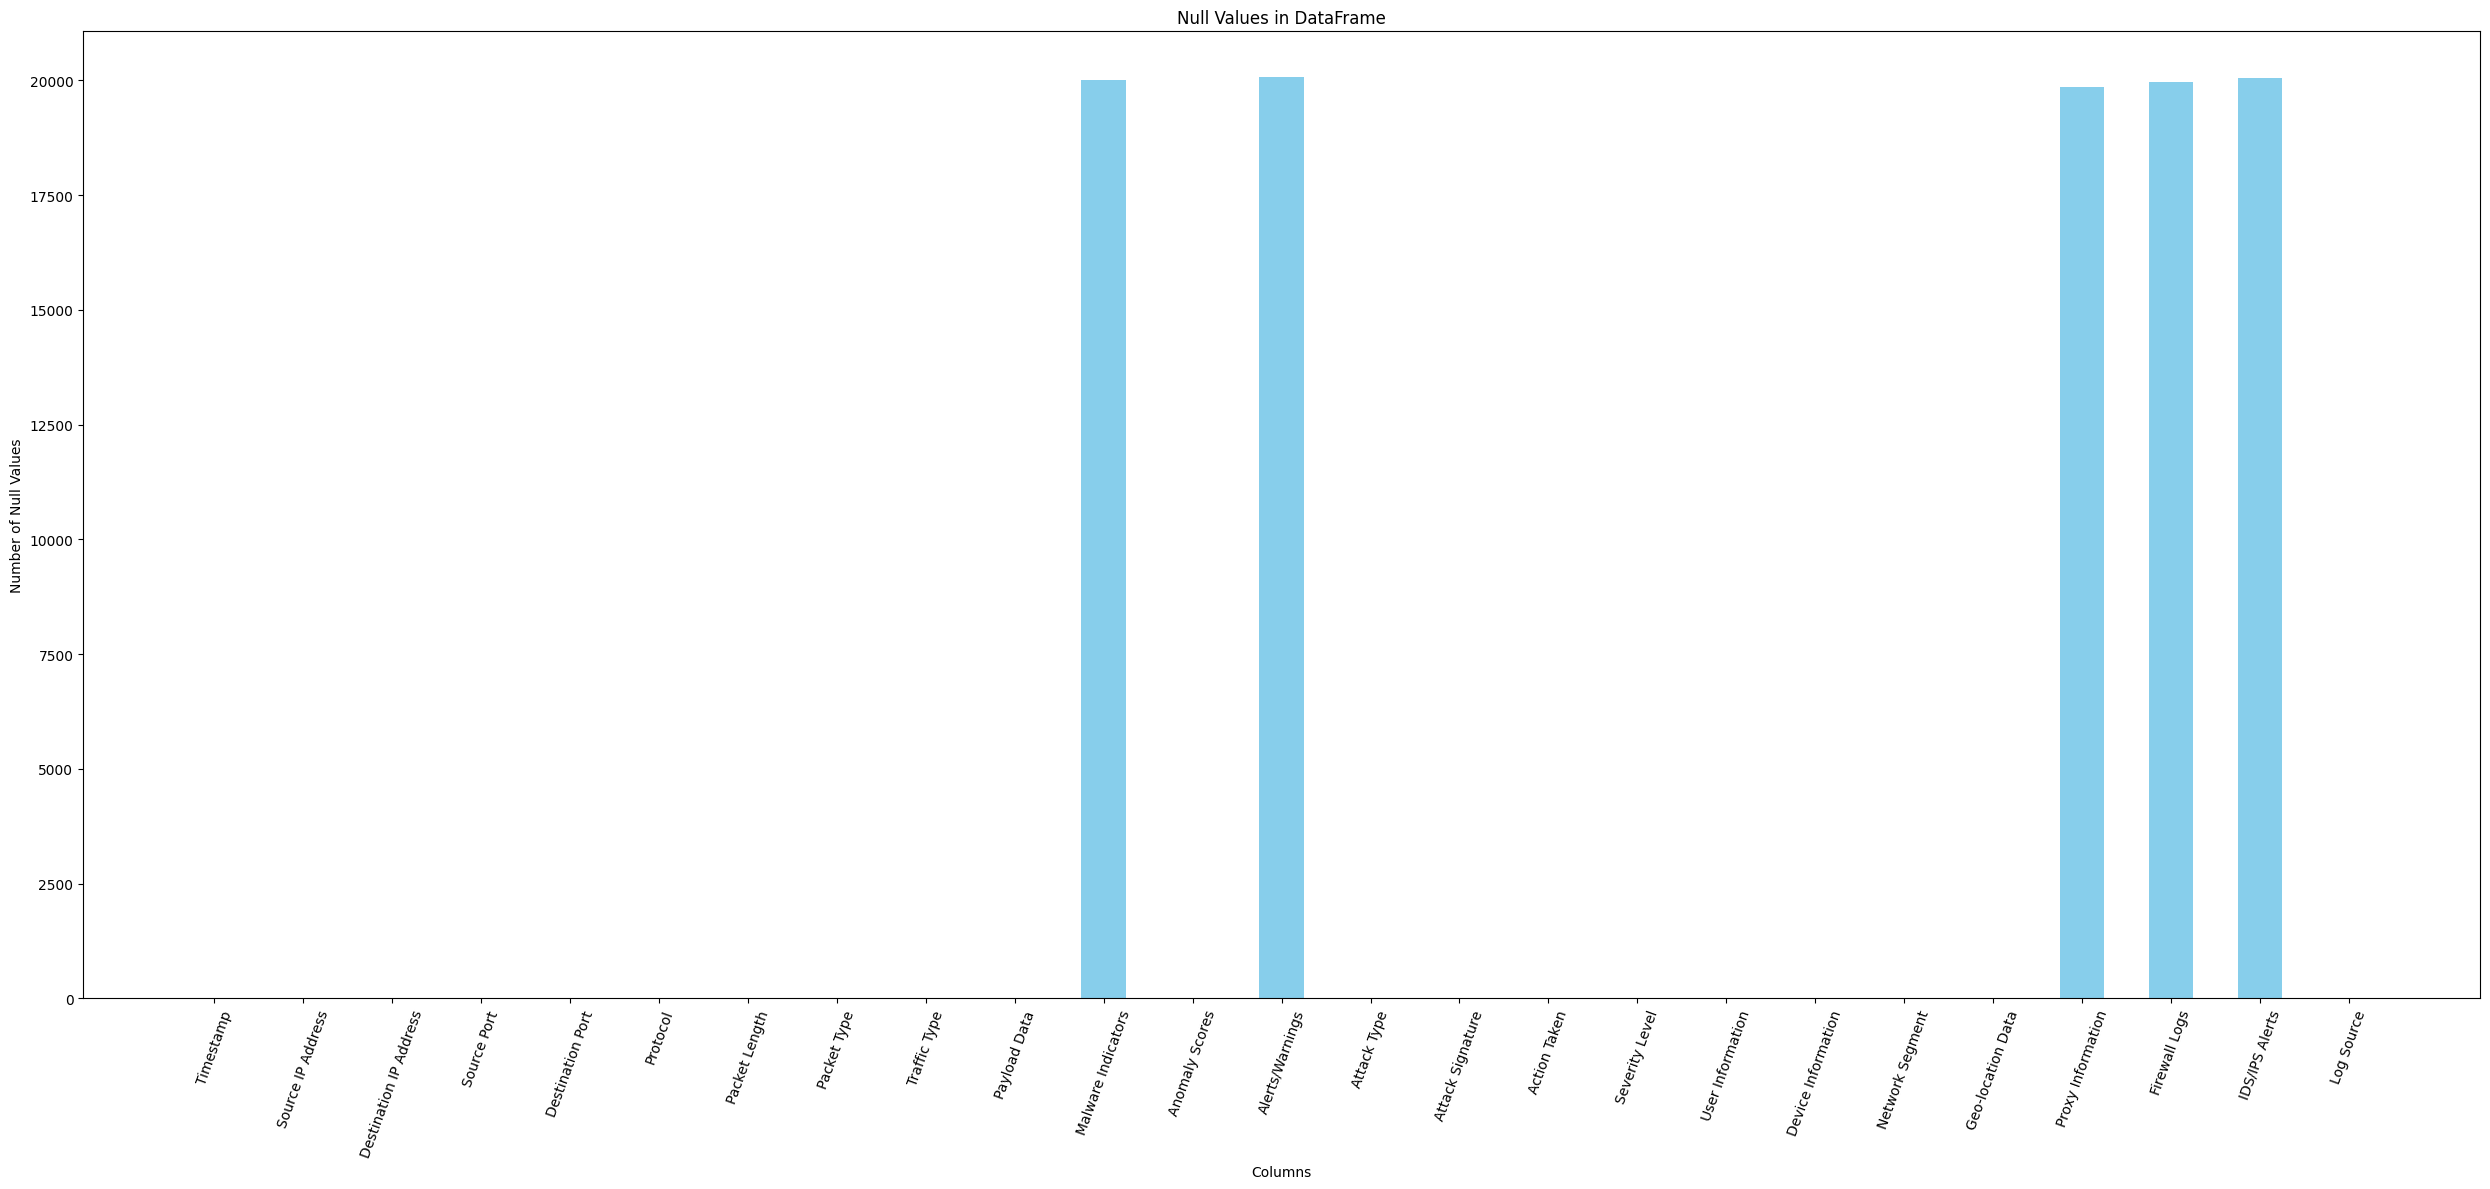

In [32]:
# Stacked Bar Plot:
plt.figure(figsize=(25, 12))  # Increase the figure size
plt.bar(null_values.index, null_values.values, width=0.5, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in DataFrame')
plt.xticks(rotation=70)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

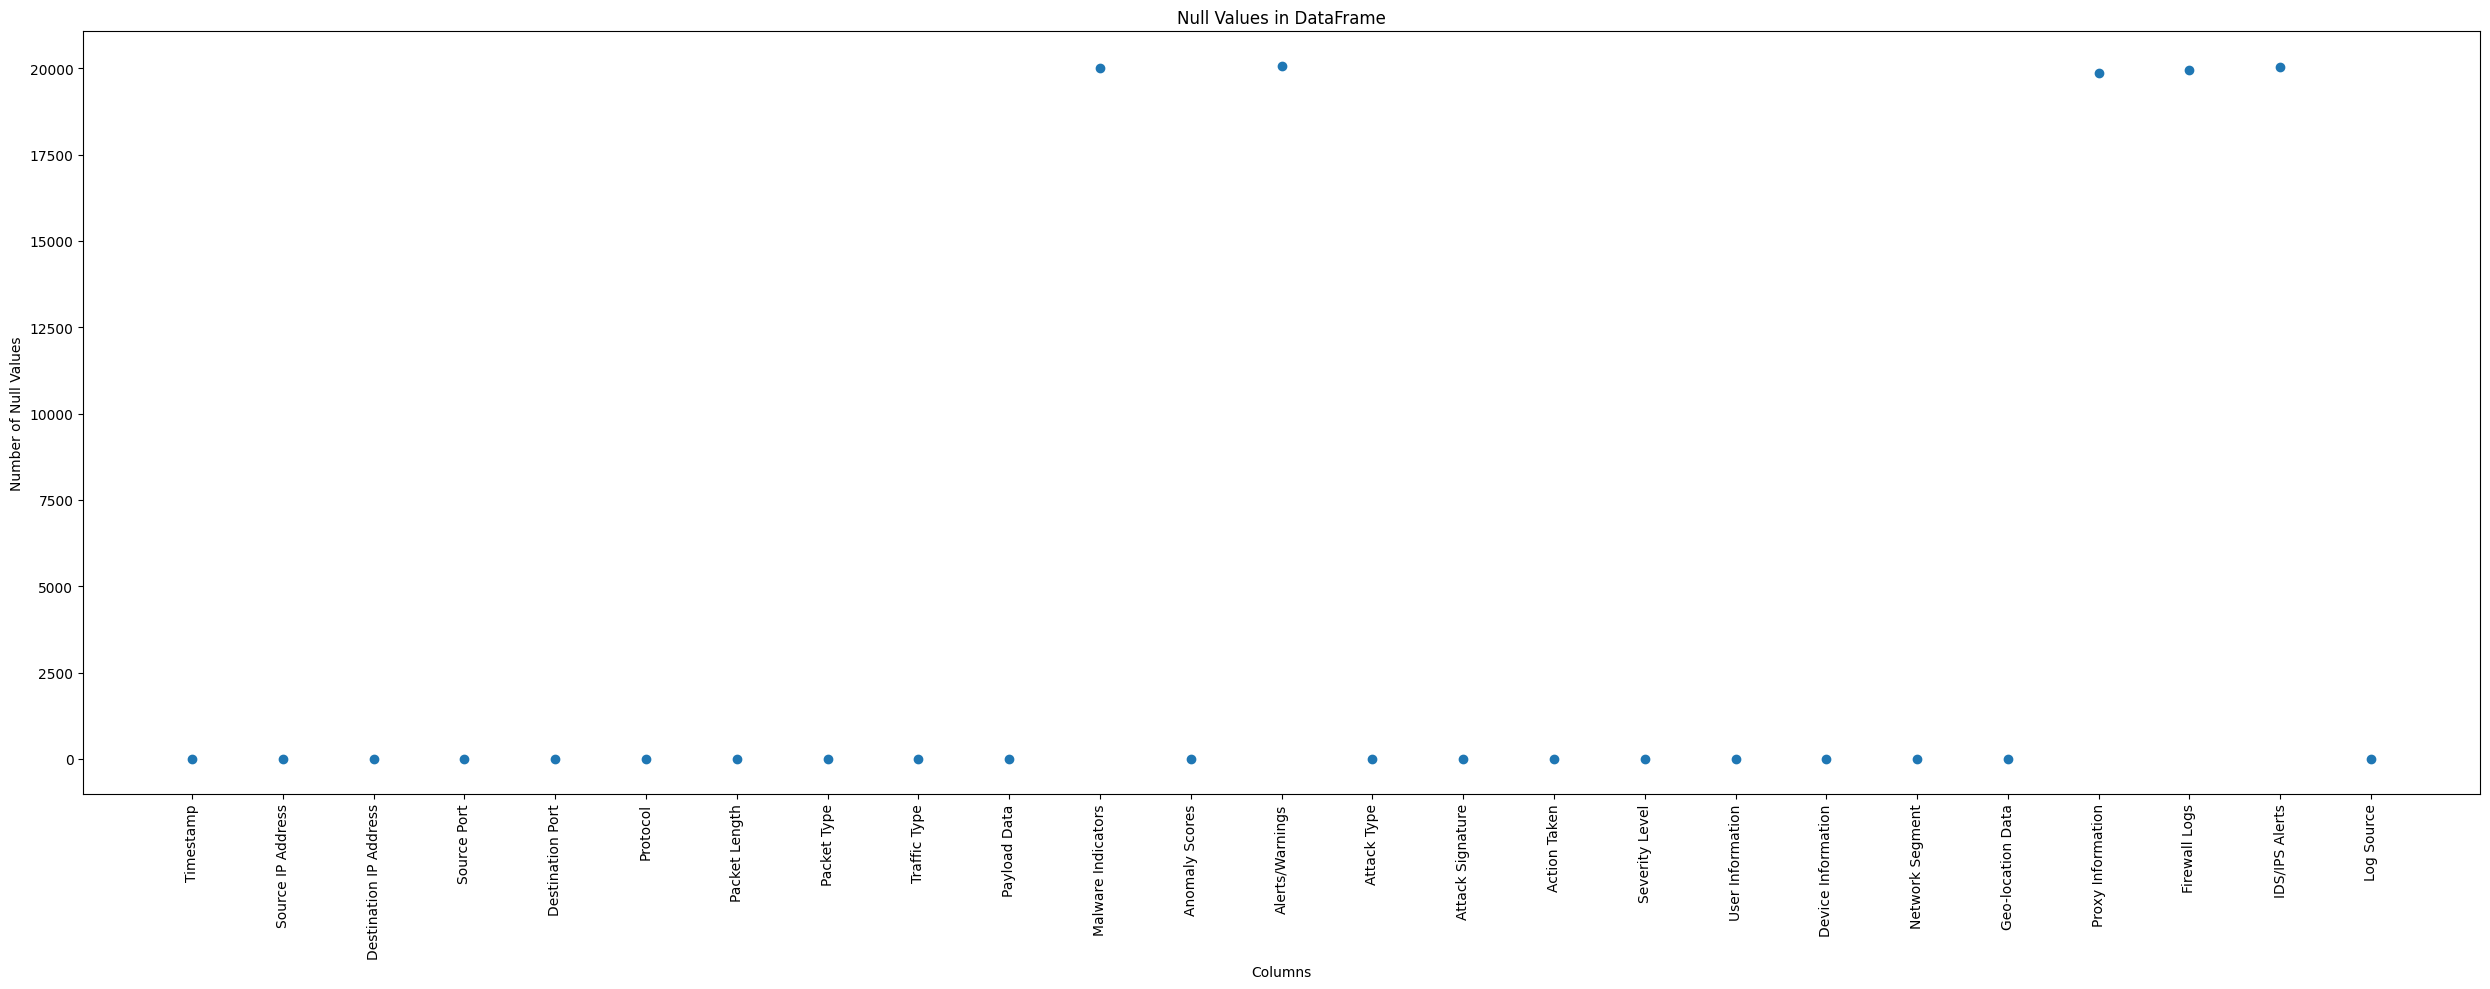

In [33]:
# Scatter Plot:
plt.figure(figsize=(25, 10))  # Increase the figure size
plt.scatter(null_values.index, null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in DataFrame')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()  # Given Results x-axis represents the column names and the y-axis represents the number of null values

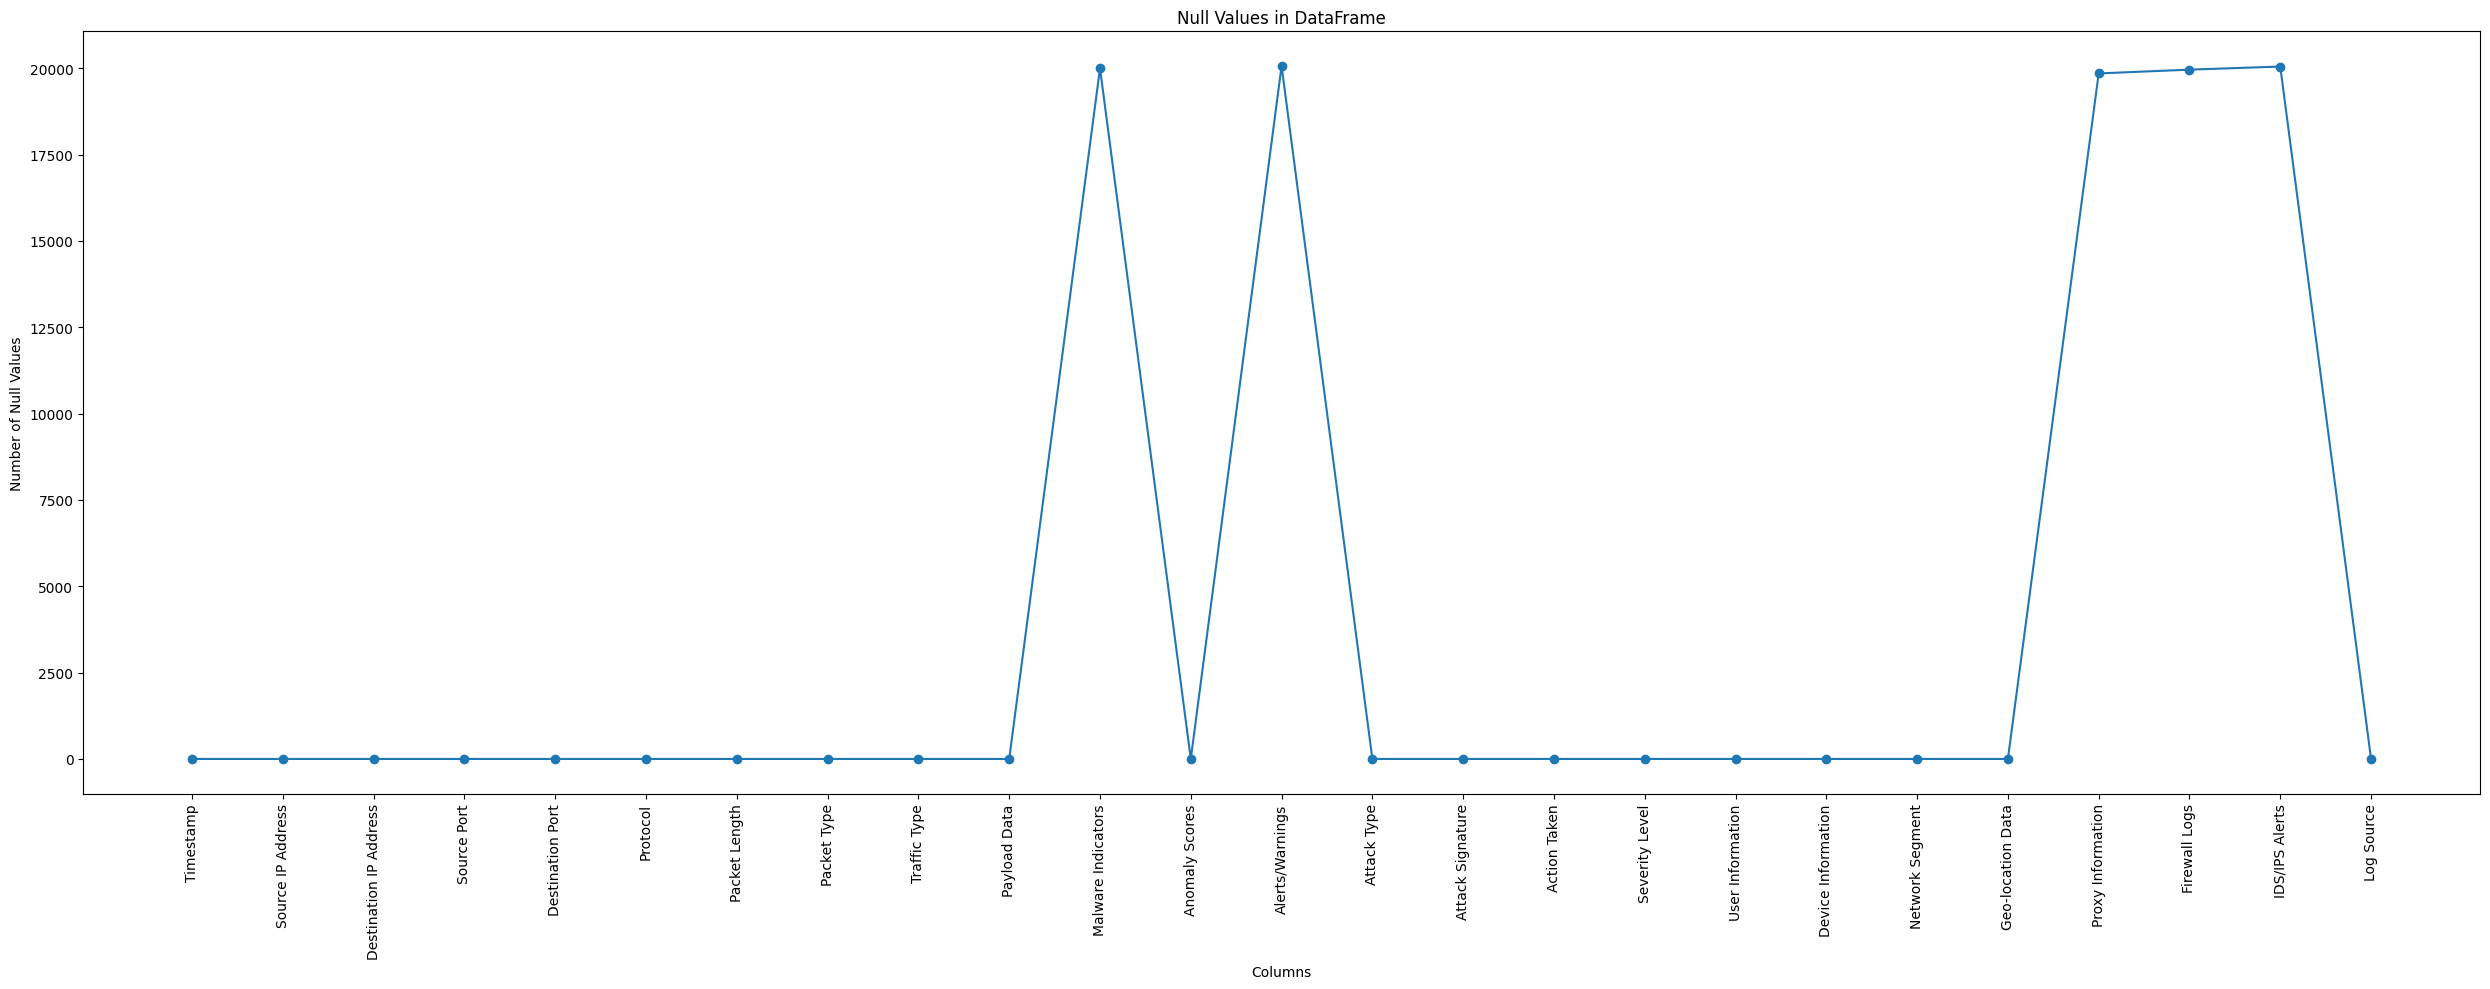

In [34]:
# Line Plot  # Same output using line plot graph
plt.figure(figsize=(25, 10))  # Increase the figure size
plt.plot(null_values.index, null_values.values, marker='o')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in DataFrame')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

In [35]:
# Here using notnull() function to get not null data if get notnull data then display True
not_null_values = df.notnull()
print(not_null_values)

       Timestamp  Source IP Address  Destination IP Address  Source Port  \
0           True               True                    True         True   
1           True               True                    True         True   
2           True               True                    True         True   
3           True               True                    True         True   
4           True               True                    True         True   
...          ...                ...                     ...          ...   
39995       True               True                    True         True   
39996       True               True                    True         True   
39997       True               True                    True         True   
39998       True               True                    True         True   
39999       True               True                    True         True   

       Destination Port  Protocol  Packet Length  Packet Type  Traffic Type  \
0       

In [36]:
# Here checking total null or not null values in every columns 
not_null_values = df.notnull().sum()
print(not_null_values)

Timestamp                 40000
Source IP Address         40000
Destination IP Address    40000
Source Port               40000
Destination Port          40000
Protocol                  40000
Packet Length             40000
Packet Type               40000
Traffic Type              40000
Payload Data              40000
Malware Indicators        20000
Anomaly Scores            40000
Alerts/Warnings           19933
Attack Type               40000
Attack Signature          40000
Action Taken              40000
Severity Level            40000
User Information          40000
Device Information        40000
Network Segment           40000
Geo-location Data         40000
Proxy Information         20149
Firewall Logs             20039
IDS/IPS Alerts            19950
Log Source                40000
dtype: int64


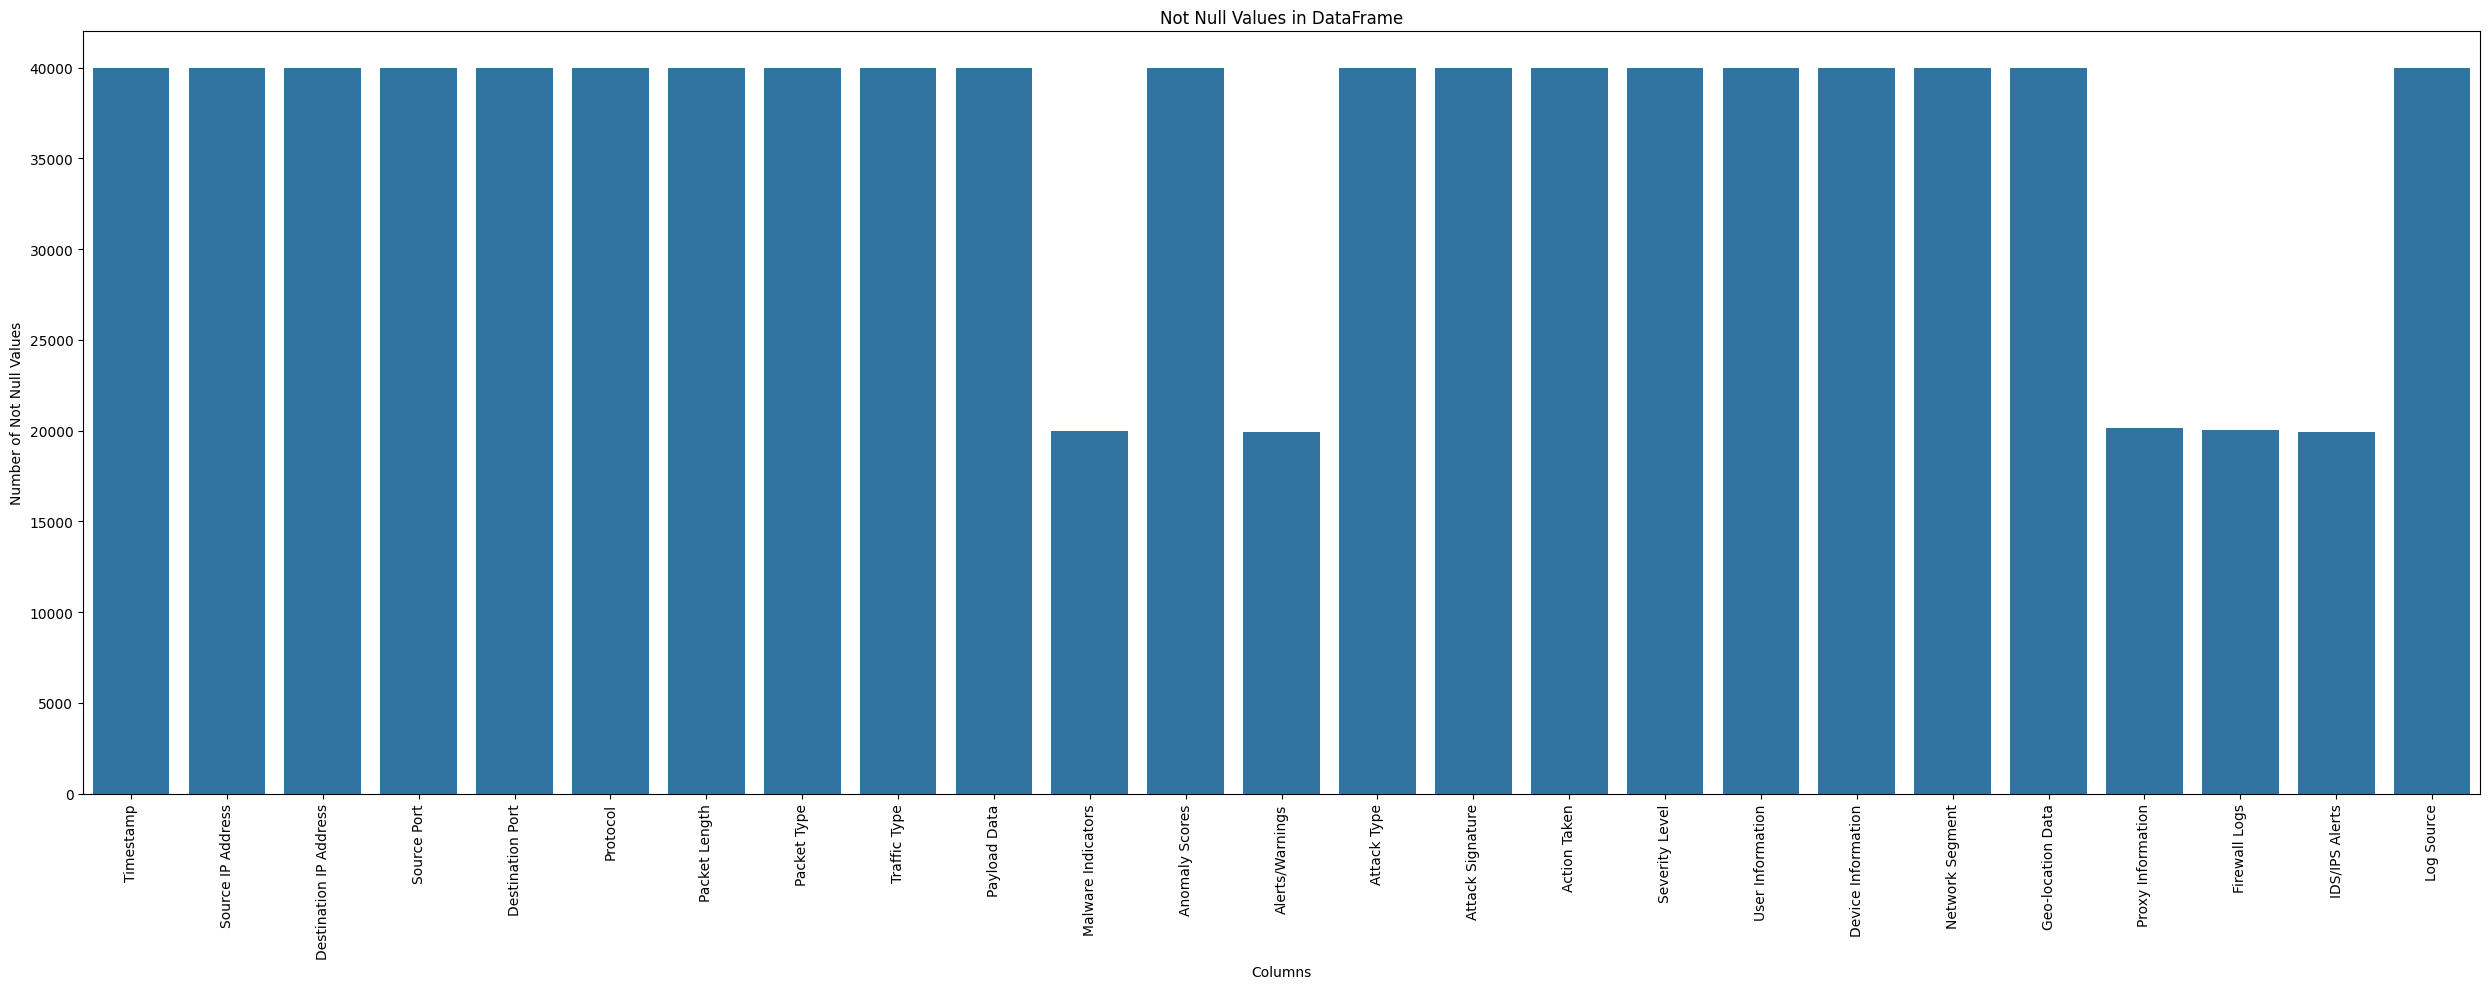

In [37]:
# Here Create a bar plot
plt.figure(figsize=(25, 10))  # Increase the figure size
sns.barplot(x=not_null_values.index, y=not_null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Not Null Values')
plt.title('Not Null Values in DataFrame')  # Update title to reflect the data
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show() # Given Results x-axis represents the column names and the y-axis represents the number of null values

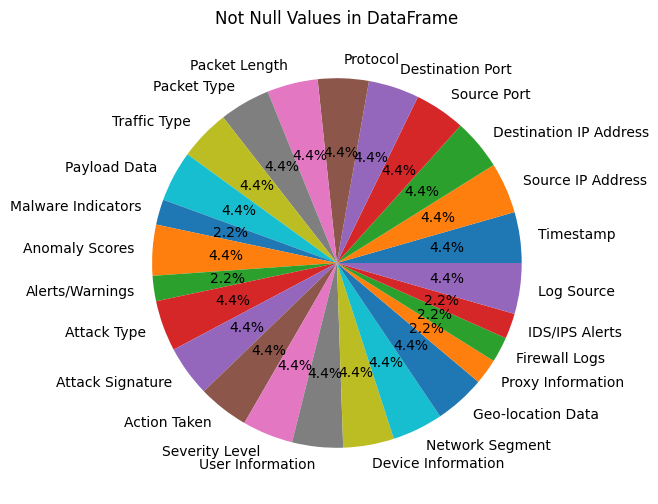

In [38]:
# Here Create a pie chart # same result in pie chart
plt.figure(figsize=(10, 6))
plt.pie(not_null_values.values, labels=not_null_values.index, autopct='%1.1f%%')
plt.title('Not Null Values in DataFrame')
plt.show()

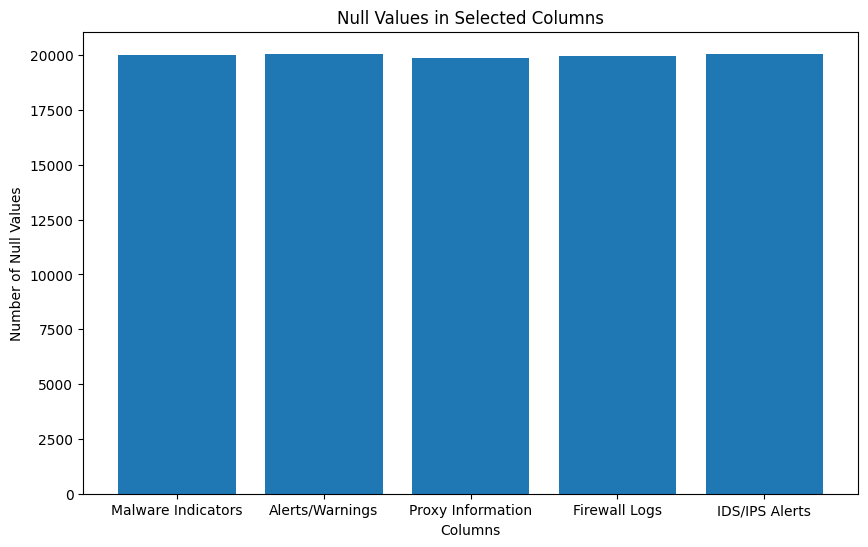

In [39]:
# Here all somes colums having null values like ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']
# Using matplotlib
null_value_columns = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']

# Calculate null values for the selected columns
null_values = df[null_value_columns].isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(null_values.index, null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Selected Columns')
plt.show()

	Missing Values in Pie chart:


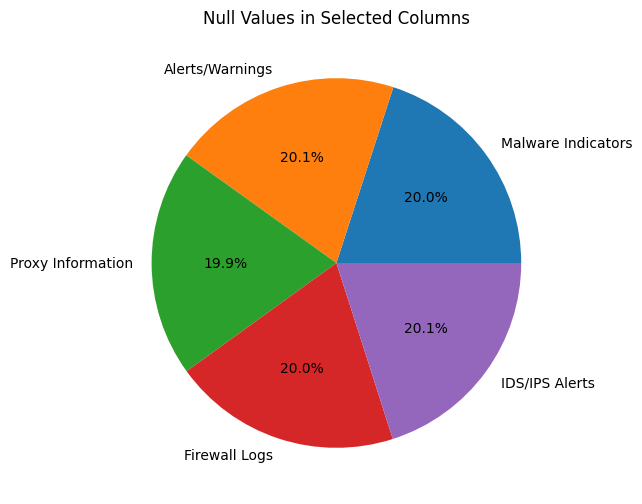

In [40]:
# Create pie chart # same output in pie chart
null_value_columns = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']

# Calculate null values for the selected columns
null_values = df[null_value_columns].isnull().sum()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(null_values.values, labels=null_values.index, autopct='%1.1f%%')
plt.title('Null Values in Selected Columns')
print("\tMissing Values in Pie chart:")
plt.show()

	Missing Values in bar plot:


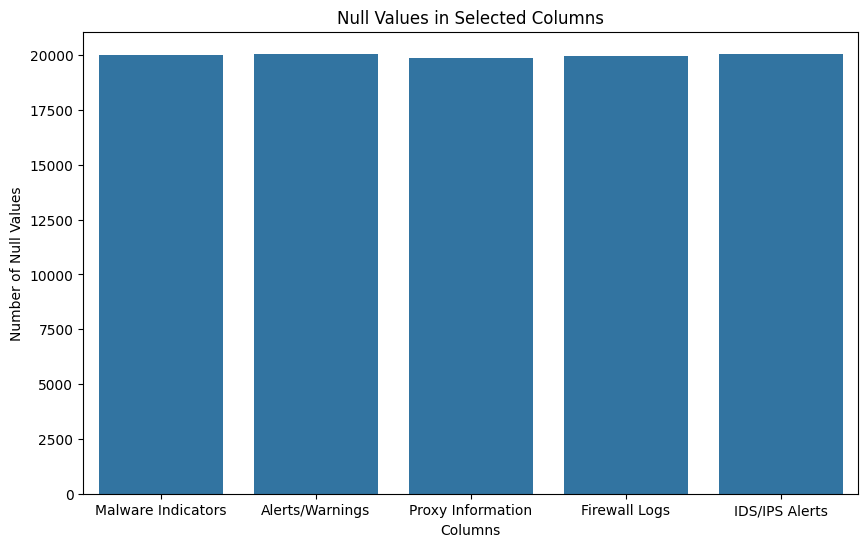

In [41]:
# Here all somes colums having null values like ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']
# Using Seaborn
null_value_columns = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']

# Calculate null values for the selected columns
null_values = df[null_value_columns].isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Selected Columns')
print("\tMissing Values in bar plot:")
plt.show()

In [42]:
# Here checking total size of a particular column
print(df['Firewall Logs'].size)

40000


In [43]:
# Here checking total Nan and missing value a particular column
print(df['Firewall Logs'].isnull().sum())

19961


In [44]:
# Here checking total not values 
print(df['Firewall Logs'].notnull().sum())

20039


In [45]:
print(df['Firewall Logs'].value_counts())

Firewall Logs
Log Data    20039
Name: count, dtype: int64


In [46]:
print(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [47]:
# Here we can get any particular column
print(df['Firewall Logs'])

0        Log Data
1        Log Data
2        Log Data
3             NaN
4             NaN
           ...   
39995    Log Data
39996    Log Data
39997    Log Data
39998    Log Data
39999    Log Data
Name: Firewall Logs, Length: 40000, dtype: object


In [48]:
print(df['Firewall Logs'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        Log Data
1        Log Data
2        Log Data
3             NaN
4             NaN
           ...   
39995    Log Data
39996    Log Data
39997    Log Data
39998    Log Data
39999    Log Data
Name: Firewall Logs, Length: 40000, dtype: object>


In [49]:
print(df.size)

1000000


# Fill missing values in categorical columns with 'Unknown' and Fill missing values in numerical columns with mean

In [50]:
# Fill missing values in categorical columns with 'Unknown'
categorical_cols_with_na = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Packet Type']
df[categorical_cols_with_na] = df[categorical_cols_with_na].fillna('Unknown')

# Fill missing values in numerical columns with mean
numerical_cols_with_na = ['Packet Length']
df[numerical_cols_with_na] = df[numerical_cols_with_na].fillna(df[numerical_cols_with_na].mean())
print("Missing Values After Filling:")
print(df.isnull().sum())

Missing Values After Filling:
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64


# Dropping Unnecessary columns

In [51]:
# Dropping unnecessary columns for the neural network model
# code 10
columns_to_drop = ['Source IP Address', 'Destination IP Address', 'Payload Data', 
                   'User Information', 'Device Information', 'Geo-location Data', 'Log Source']
dataset_cleaned = df.drop(columns=columns_to_drop)
print(dataset_cleaned)

                 Timestamp  Source Port  Destination Port Protocol  \
0      2023-05-30 06:33:58        31225             17616     ICMP   
1      2020-08-26 07:08:30        17245             48166     ICMP   
2      2022-11-13 08:23:25        16811             53600      UDP   
3      2023-07-02 10:38:46        20018             32534      UDP   
4      2023-07-16 13:11:07         6131             26646      TCP   
...                    ...          ...               ...      ...   
39995  2023-05-26 14:08:42        31005              6764      UDP   
39996  2023-03-27 00:38:27         2553             28091      UDP   
39997  2022-03-31 01:45:49        22505             25152      UDP   
39998  2023-09-22 18:32:38        20013              2703      UDP   
39999  2023-10-10 11:59:52        50137             55575     ICMP   

       Packet Length Packet Type Traffic Type Malware Indicators  \
0                503        Data         HTTP       IoC Detected   
1               1174   

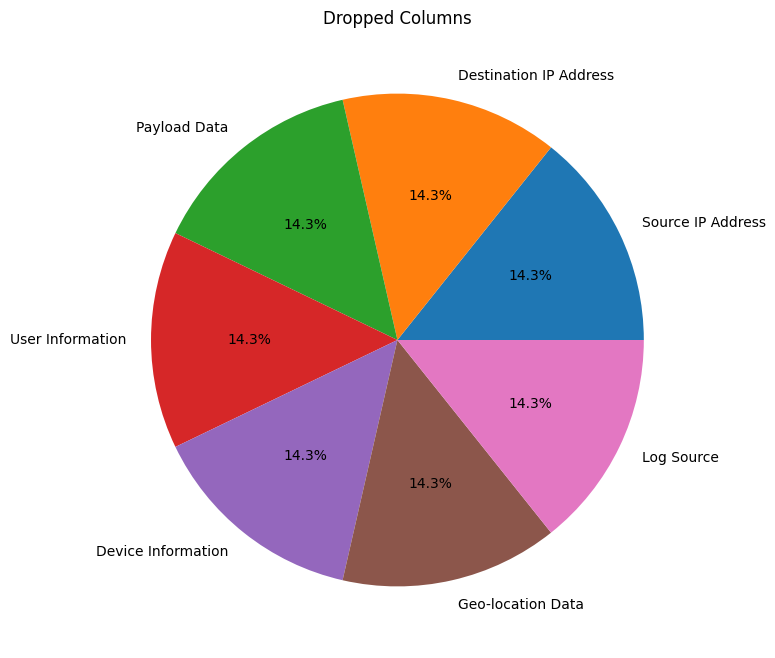

In [52]:
# Here's the code to create a pie chart graph for the dropped columns:
# Create a pie chart for the dropped columns
plt.figure(figsize=(10, 8))
plt.pie([1]*len(columns_to_drop), labels=columns_to_drop, autopct='%1.1f%%')
plt.title('Dropped Columns')
plt.show()

In [53]:
print(dataset_cleaned.shape)

(40000, 18)


In [54]:
# code 12
print(dataset_cleaned.columns)

Index(['Timestamp', 'Source Port', 'Destination Port', 'Protocol',
       'Packet Length', 'Packet Type', 'Traffic Type', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'Network Segment',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts'],
      dtype='object')


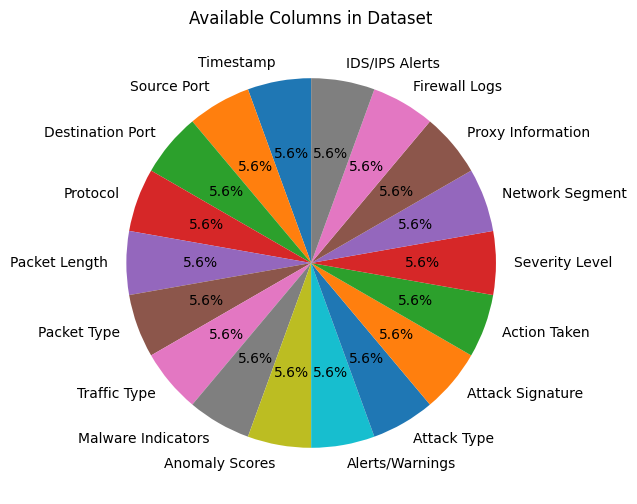

In [55]:
# Here's the code to create a pie chart graph for the given columns:
# Create a pie chart for the columns
# code 13
plt.figure(figsize=(8, 6))
plt.pie([1]*len(dataset_cleaned.columns), labels=dataset_cleaned.columns, autopct='%1.1f%%', startangle=90)
plt.title('Available Columns in Dataset')
plt.show()

In [60]:
# Encoded values for each categorical column: The code iterates through each categorical column, encodes it, and prints the first few encoded values.
# # Encode categorical variables
# label_encoders = {}
# for column in non_numeric_columns:
#     label_encoders[column] = LabelEncoder()
#     df[column] = label_encoders[column].fit_transform(df[column])

# # Feature scaling
# scaler = StandardScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# # Splitting the data into features and target
# X = df.drop(columns=['target_column_name'])  # Replace 'target_column_name' with the actual target column
# y = df['target_column_name']  # Replace with the actual target column name

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Handle Missing Values           ***************


In [71]:
# Handling missing values
# Filling missing values in categorical columns with 'Unknown'
categorical_cols_with_na = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 
                            'Firewall Logs', 'IDS/IPS Alerts']
dataset_cleaned[categorical_cols_with_na] = dataset_cleaned[categorical_cols_with_na].fillna('Unknown')
print(dataset_cleaned[categorical_cols_with_na].head())  # Display the first few rows of these columns

  Malware Indicators  Alerts/Warnings Proxy Information Firewall Logs  \
0       IoC Detected          Unknown      150.9.97.135      Log Data   
1       IoC Detected          Unknown           Unknown      Log Data   
2       IoC Detected  Alert Triggered    114.133.48.179      Log Data   
3            Unknown  Alert Triggered           Unknown       Unknown   
4            Unknown  Alert Triggered     149.6.110.119       Unknown   

  IDS/IPS Alerts  
0        Unknown  
1        Unknown  
2     Alert Data  
3     Alert Data  
4     Alert Data  


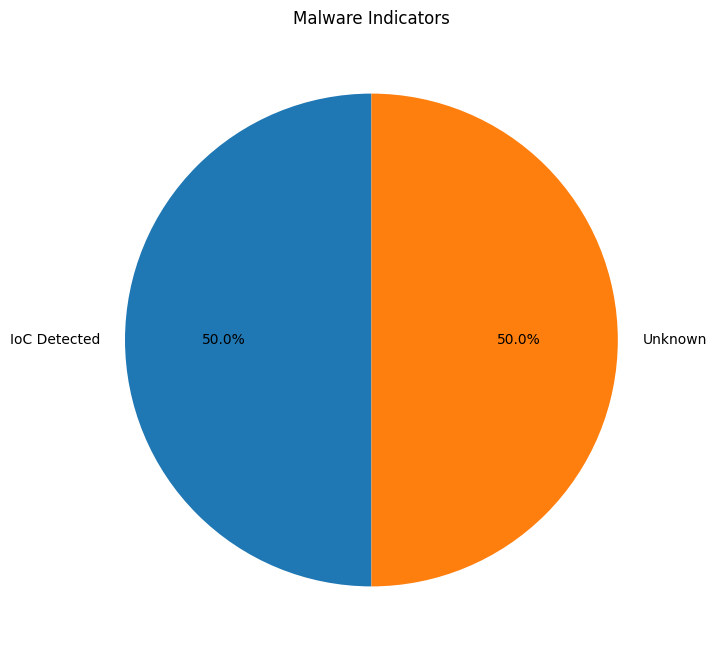

In [70]:
# Create a pie chart for the categorical columns (like Malware Indicators) with NA values filled
plt.figure(figsize=(12, 8))
plt.pie(dataset_cleaned['Malware Indicators'].value_counts(), labels=dataset_cleaned['Malware Indicators'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Malware Indicators')
plt.show()

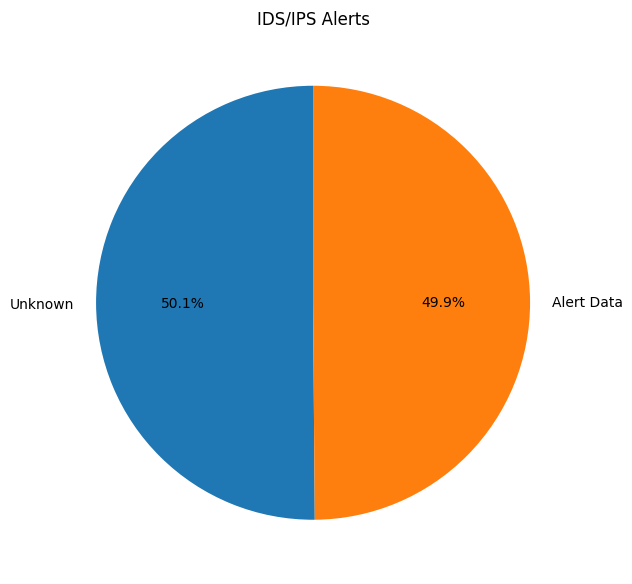

In [63]:
# Create a pie chart for the IDS/IPS Alerts columns with NA values filled
plt.figure(figsize=(7, 10))
plt.pie(dataset_cleaned['IDS/IPS Alerts'].value_counts(), labels=dataset_cleaned['IDS/IPS Alerts'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('IDS/IPS Alerts')
plt.show()

In [64]:
print(dataset_cleaned.isnull().sum())

Timestamp             0
Source Port           0
Destination Port      0
Protocol              0
Packet Length         0
Packet Type           0
Traffic Type          0
Malware Indicators    0
Anomaly Scores        0
Alerts/Warnings       0
Attack Type           0
Attack Signature      0
Action Taken          0
Severity Level        0
Network Segment       0
Proxy Information     0
Firewall Logs         0
IDS/IPS Alerts        0
dtype: int64


In [69]:
# Calculate null values for each column 
null_values = dataset_cleaned.isnull().sum()
print(null_values)

Timestamp             0
Source Port           0
Destination Port      0
Protocol              0
Packet Length         0
Packet Type           0
Traffic Type          0
Malware Indicators    0
Anomaly Scores        0
Alerts/Warnings       0
Attack Type           0
Attack Signature      0
Action Taken          0
Severity Level        0
Network Segment       0
Proxy Information     0
Firewall Logs         0
IDS/IPS Alerts        0
dtype: int64


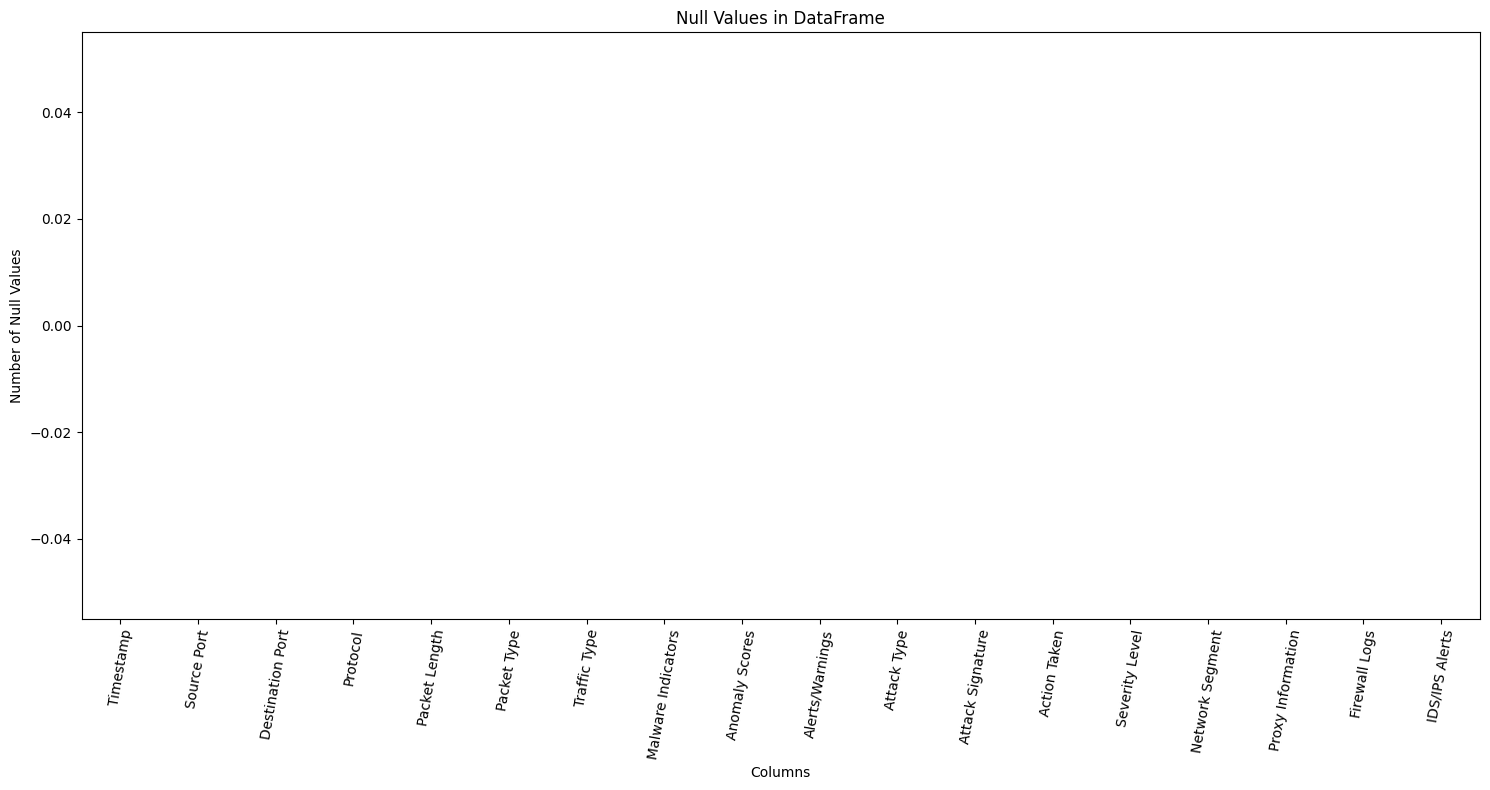

In [68]:
# Create a bar plot
plt.figure(figsize=(15, 8))  # Increase the figure size
sns.barplot(x=null_values.index, y=null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in DataFrame')
plt.xticks(rotation=80)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show() # Here show null value after cleaning missing values in graphs

In [67]:
# Calculate non-null values for each column
not_null_values = dataset_cleaned.notnull().sum()
print(not_null_values)

Timestamp             40000
Source Port           40000
Destination Port      40000
Protocol              40000
Packet Length         40000
Packet Type           40000
Traffic Type          40000
Malware Indicators    40000
Anomaly Scores        40000
Alerts/Warnings       40000
Attack Type           40000
Attack Signature      40000
Action Taken          40000
Severity Level        40000
Network Segment       40000
Proxy Information     40000
Firewall Logs         40000
IDS/IPS Alerts        40000
dtype: int64


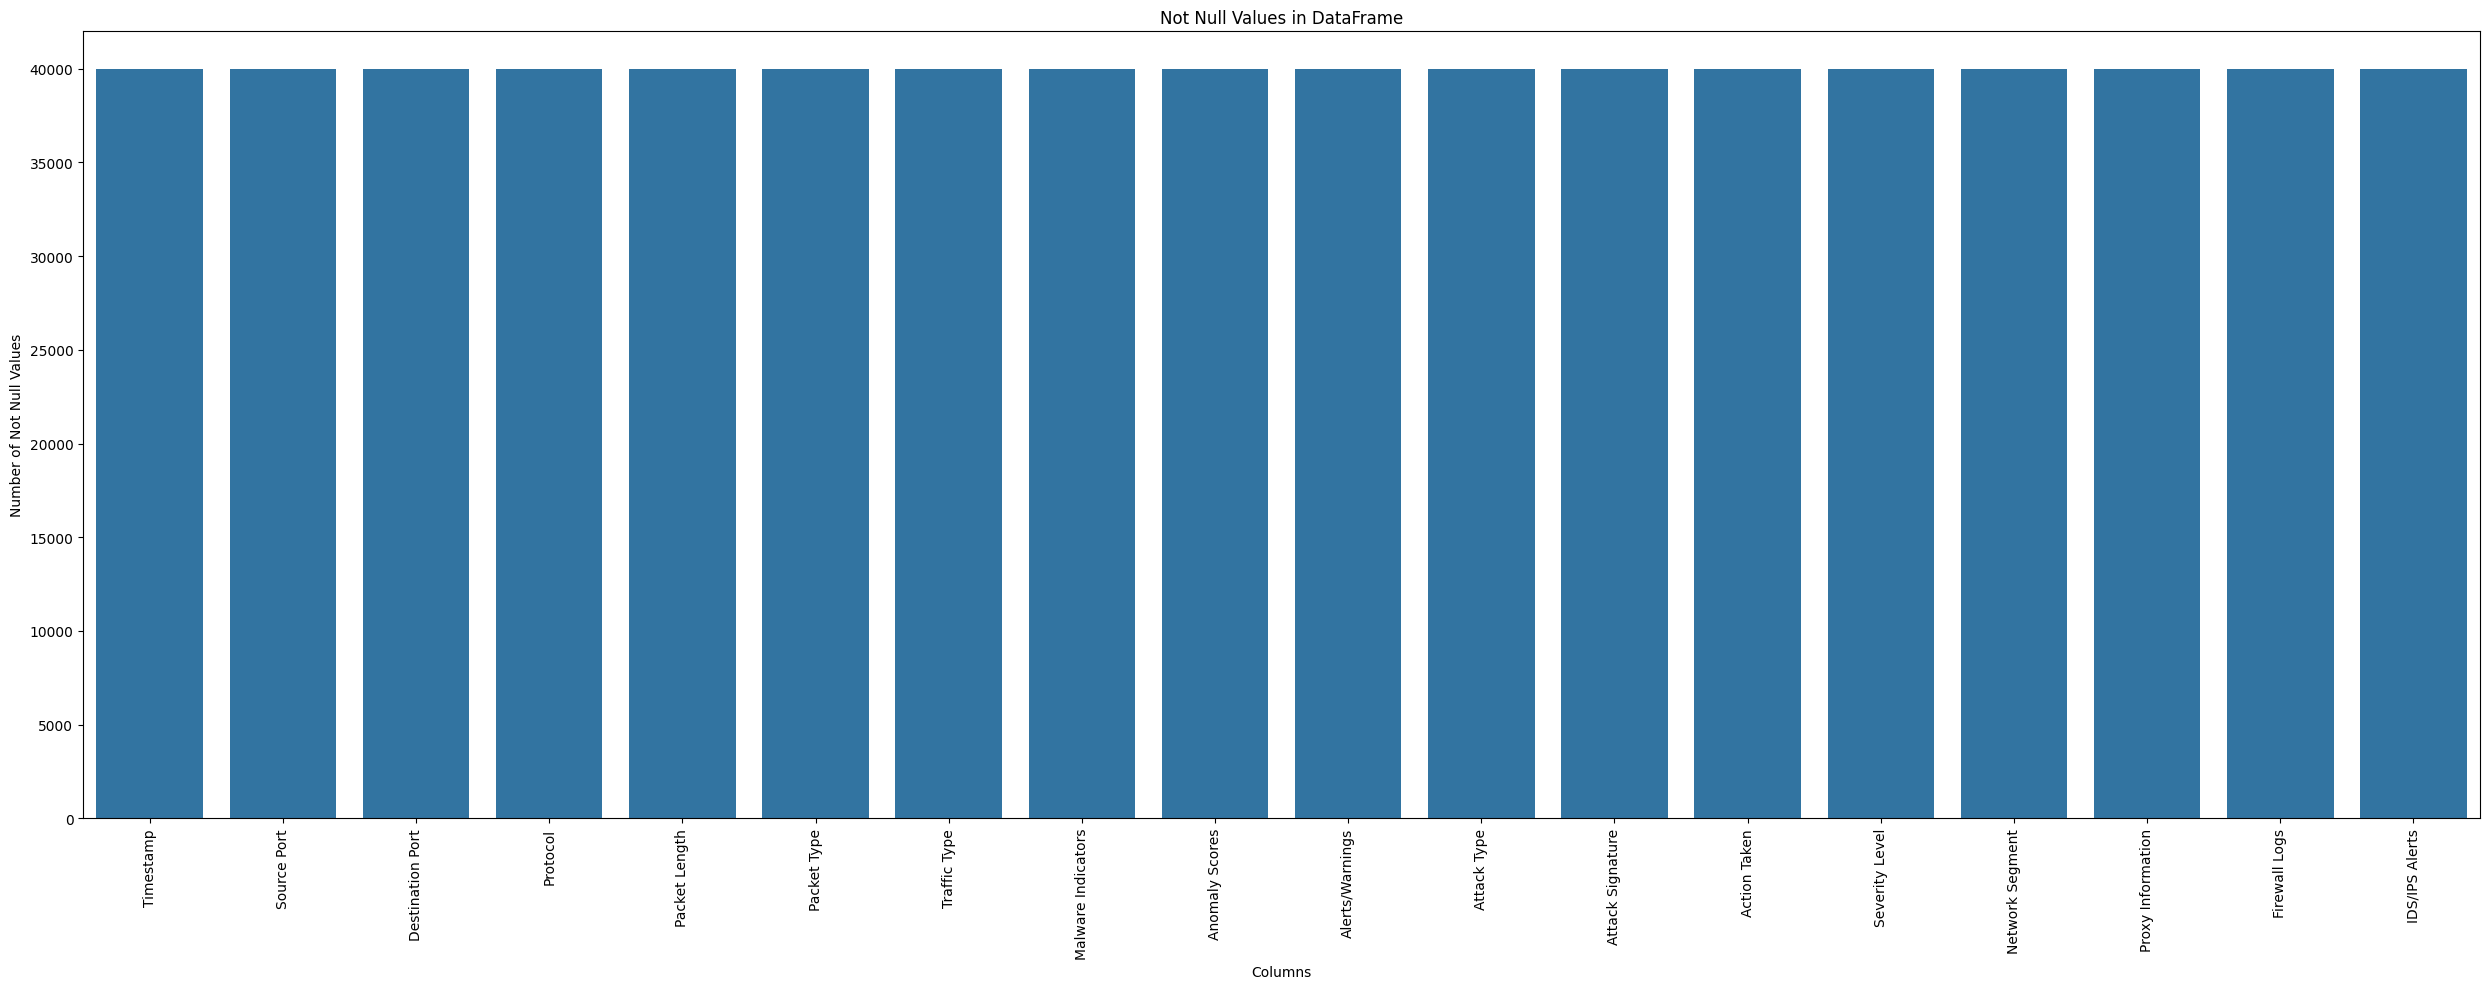

In [72]:
# Create a bar plot
plt.figure(figsize=(25, 10))  # Increase the figure size
sns.barplot(x=not_null_values.index, y=not_null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Not Null Values')
plt.title('Not Null Values in DataFrame')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()  # Here show not null value after cleaning missing values in bar plot graphs

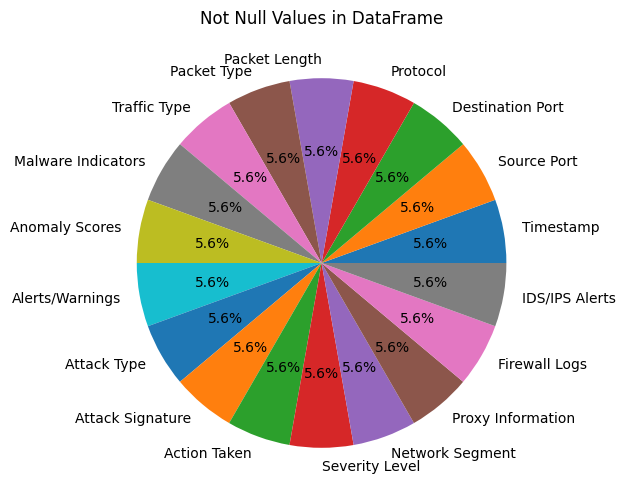

In [73]:
# Calculate non-null values for each column
# Create a pie chart
# code 19
plt.figure(figsize=(10, 6))
plt.pie(not_null_values.values, labels = not_null_values.index, autopct='%1.1f%%')
plt.title('Not Null Values in DataFrame')
plt.show() # Here show not null value after cleaning missing values in pie chart graphs

In [74]:
# Encoded values for each categorical column: The code iterates through each categorical column, encodes it, and prints the first few encoded values.
# Encoding categorical variables
# code 20
label_encoders = {}
for col in categorical_cols_with_na:
    le = LabelEncoder()
    dataset_cleaned[col] = le.fit_transform(dataset_cleaned[col])
    label_encoders[col] = le
    print(f"Encoded values for '{col}':")
    print(dataset_cleaned[col].head())
    print("\n")  # Add a newline for better readability

Encoded values for 'Malware Indicators':
0    0
1    0
2    0
3    1
4    1
Name: Malware Indicators, dtype: int32


Encoded values for 'Alerts/Warnings':
0    1
1    1
2    0
3    0
4    0
Name: Alerts/Warnings, dtype: int32


Encoded values for 'Proxy Information':
0     5143
1    20148
2     1568
3    20148
4     4967
Name: Proxy Information, dtype: int32


Encoded values for 'Firewall Logs':
0    0
1    0
2    0
3    1
4    1
Name: Firewall Logs, dtype: int32


Encoded values for 'IDS/IPS Alerts':
0    1
1    1
2    0
3    0
4    0
Name: IDS/IPS Alerts, dtype: int32




# Encode Target Variable

In [75]:
# Encoded values for the target variable: After encoding the target variable, the first few encoded values are printed.
# Assuming 'Attack Type' is the target variable # Encoding the target variable
# code 21
target_column = 'Attack Type'
label_encoder = LabelEncoder()
dataset_cleaned[target_column] = label_encoder.fit_transform(dataset_cleaned[target_column])

print(f"Encoded values for target '{target_column}':")
print(dataset_cleaned[target_column].head())

Encoded values for target 'Attack Type':
0    2
1    2
2    0
3    2
4    0
Name: Attack Type, dtype: int32


# Split Dataset into Features and Target

In [76]:
# Shape of features and target: Before splitting, the shape of the features (X) and target (y) is printed to give you an idea of the dimensions of your dataset.
# Splitting dataset into features and target
# code 22
X = dataset_cleaned.drop(columns=[target_column])
y = dataset_cleaned[target_column]

# Display the shape of the features and target
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (40000, 17)
Shape of target (y): (40000,)


# Split Data into Training and Testing Sets

In [77]:
# Splitting data into training and testing sets
# code 23
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (32000, 17)
Shape of X_test: (8000, 17)
Shape of y_train: (32000,)
Shape of y_test: (8000,)


In [78]:
print(dataset_cleaned.dtypes)

Timestamp              object
Source Port             int64
Destination Port        int64
Protocol               object
Packet Length           int64
Packet Type            object
Traffic Type           object
Malware Indicators      int32
Anomaly Scores        float64
Alerts/Warnings         int32
Attack Type             int32
Attack Signature       object
Action Taken           object
Severity Level         object
Network Segment        object
Proxy Information       int32
Firewall Logs           int32
IDS/IPS Alerts          int32
dtype: object


# Standardize the Features

In [79]:
# Dropping non-numeric columns (e.g., datetime or categorical data that hasn't been encoded)
# code 25
non_numeric_cols = dataset_cleaned.select_dtypes(exclude=[np.number]).columns
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the first few rows of the standardized training features
print("First few rows of standardized X_train:")
print(pd.DataFrame(X_train).head())

First few rows of standardized X_train:
          0         1         2         3         4         5         6  \
0 -1.387658 -1.529060 -0.120189 -0.999125 -1.490538 -1.007654  0.780369   
1  0.817689 -0.698933  1.603292  1.000875  0.133177  0.992404 -0.807256   
2  0.053260 -1.019785  0.815963  1.000875  1.130013  0.992404 -1.984854   
3 -1.190991 -0.603188 -0.175398  1.000875  1.258995 -1.007654 -0.860044   
4 -1.425960  1.270772  1.015196 -0.999125  0.452511  0.992404 -2.294983   

          7         8  
0  1.002816 -1.000188  
1  1.002816 -1.000188  
2  1.002816  0.999813  
3 -0.997191 -1.000188  
4 -0.997191  0.999813  


# Build the Neural Network Model

In [80]:
# Building the neural network model
# code 26
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape here
    Dense(128, activation='relu'),
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary to verify the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,715 (45.76 KB)

 Trainable params: 11,715 (45.76 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model with Early Stopping

In [81]:
# Early stopping to prevent overfitting and improve computational efficiency
# code 27
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

# Display training history (optional)
print(history.history)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3270 - loss: 1.1082 - val_accuracy: 0.3433 - val_loss: 1.0983
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3342 - loss: 1.1004 - val_accuracy: 0.3367 - val_loss: 1.0989
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3404 - loss: 1.0990 - val_accuracy: 0.3316 - val_loss: 1.0987
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3414 - loss: 1.0988 - val_accuracy: 0.3166 - val_loss: 1.0995
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3408 - loss: 1.0982 - val_accuracy: 0.3259 - val_loss: 1.0988
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3385 - loss: 1.0983 - val_accuracy: 0.3370 - val_loss: 1.0996
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3394 - loss: 1.0982 - val_accuracy: 0.3266 - val_loss: 1.0995
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3476 - loss: 1.0980 - val_accu

# Evaluate the Model

In [82]:
# Evaluating the model
# code 28
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.335
              precision    recall  f1-score   support

        DDoS       0.33      0.71      0.45      2636
   Intrusion       0.34      0.21      0.26      2721
     Malware       0.34      0.09      0.14      2643

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.29      8000
weighted avg       0.34      0.34      0.28      8000



# Save the Model, Label Encoders, and Scaler

In [83]:
# Saving the model for future adaptability in the recommended Keras format
# 29
model.save('cybersecurity_model.keras')  # Updated this line

# Save label encoders for later use
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model, label encoders, and scaler saved.")

Model, label encoders, and scaler saved.
